# Task for Collaborator #3
 _Macabe Daley_

1. Look for correlations between the variables related to the fundamental frequency ('MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)’ and MDVP:Flo(Hz) in the original dataframe) using the scat_plot function. Use the scat_plot function created by your collaborators for this purpose. If the variables are correlated keep only a subset that are representative (one or some of them). Discard the others by removing them from the dataframe. Do the same for the variables related to Jitter ('MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP') and Shimmer ( 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA',). Name this dataframe as cleaned_df and work with it from here on.

2. Function group_and_average(df, gv) This function averages all variables on a given dataframe by aggregating them according to the variable gv. You can use the group_by operation from pandas. The function returns the averaged and aggregated dataframe. Inputs: df: a dataframe gv: the name of the grouping variable Outputs: av_df: averaged df

3. Implement the instructions in the main code to classify the DataFrame data into patients or controls using k-nearest neighbors with k=3. Compare the outcomes across three scenarios: 1) utilizing cleaned and aggregated data, 2) cleaned, aggregated, and z-score normalized data, and lastly, 3 the same, but normalized using the min-max option. Are there differences?

In [3]:
import pandas as pd

In [4]:
# We will start by loading the parkinson dataset. 
dex = pd.read_csv('parkinsons.data',
                 dtype = { # indicate categorical variables
                     'status': 'category'})
dex.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# Task 1: Correlations and feature selection

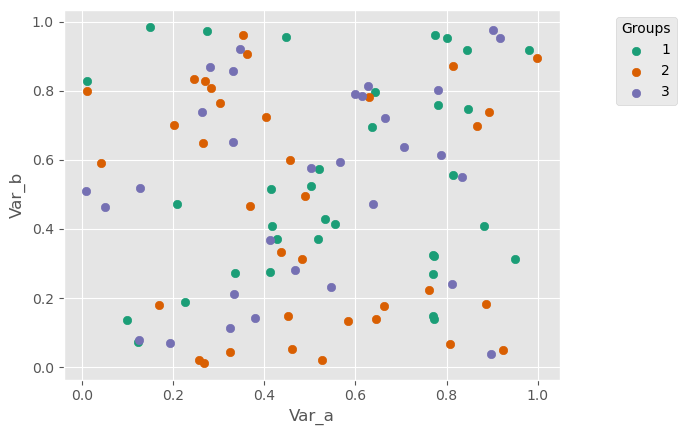

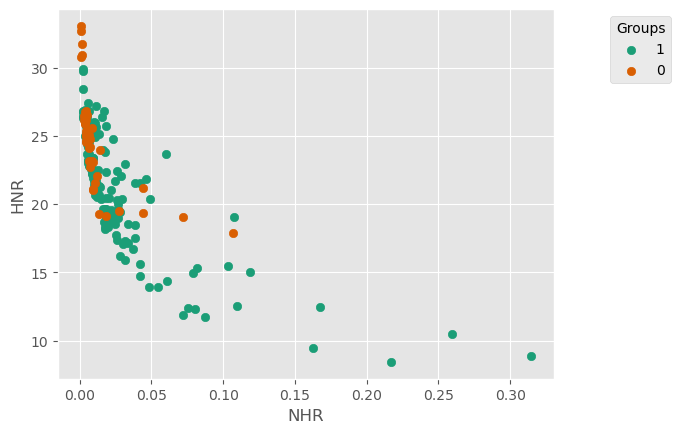

Original DataFrame:
   Var1  Var2 Category
0    10     1        C
1    20     2        B
2    30     3        A
3    40     4        C
4    50     5        A

Z-score Normalized DataFrame:
   Var1  Var2 Category
0    10     1        C
1    20     2        B
2    30     3        A
3    40     4        C
4    50     5        A

Min-max Normalized DataFrame:
   Var1  Var2 Category
0    10     1        C
1    20     2        B
2    30     3        A
3    40     4        C
4    50     5        A
Original DataFrame:
       Var_a     Var_b  Groups_c
0   0.106707  0.331671         2
1   0.637964  0.876125         1
2   0.600811  0.007915         3
3   0.986417  0.547890         2
4   0.526407  0.988353         3
..       ...       ...       ...
95  0.025292  0.004959         1
96  0.192964  0.323575         2
97  0.404001  0.961390         3
98  0.043889  0.638604         2
99  0.251441  0.852107         2

[100 rows x 3 columns]

Z-score Normalized DataFrame:
       Var_a     Var_b  Groups_c


In [5]:
# Load functions from Collaborator 2's notebook
%run Collaborator_2.ipynb

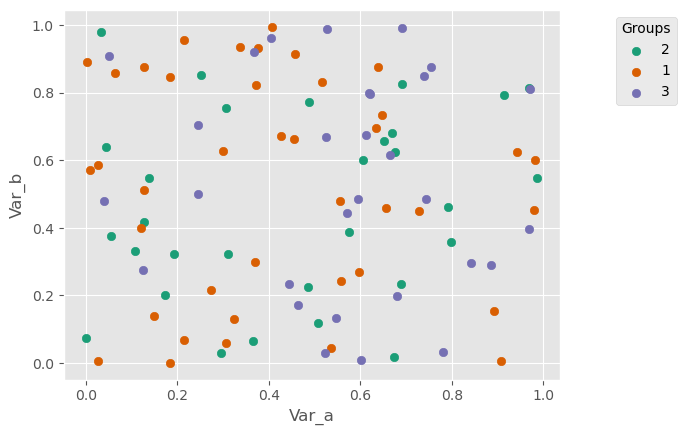

In [6]:
# double check that scat_plt works
scat_plt(df['Var_a'], df['Var_b'], df['Groups_c'])

In [7]:
# if the columns haven't been renamed yet, do this here
# note this is the same function as Collaborator 1 created, in the main merge we could use that one instead
dict_names = {'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'MDVP:Fo(Hz)':'avFF',
              'Shimmer:DDA':'dda'}

def renamevars(df, dict_names):
    df.rename(columns = dict_names, inplace = True)
    renamed_df = df
    return renamed_df

dex = renamevars(dex, dict_names=dict_names)
print(dex.columns)
dex.head()

Index(['name', 'avFF', 'maxFF', 'minFF', 'percJitter', 'absJitter', 'rap',
       'ppq', 'ddp', 'lShimer', 'dbShimer', 'apq3', 'apq5', 'apq', 'dda',
       'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2',
       'PPE'],
      dtype='object')


,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [21]:
# Identify the variables for each group that we want to explore correlation in
vars_ff = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
vars_jitter = ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']
vars_shimmer = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']

vars_ff = [dict_names[var] for var in vars_ff]
vars_jitter = [dict_names[var] for var in vars_jitter]
vars_shimmer = [dict_names[var] for var in vars_shimmer]
print(vars_ff, vars_jitter, vars_shimmer)

['avFF', 'maxFF', 'minFF'] ['absJitter', 'rap', 'ppq', 'ddp'] ['lShimer', 'dbShimer', 'apq3', 'apq5', 'apq', 'dda']


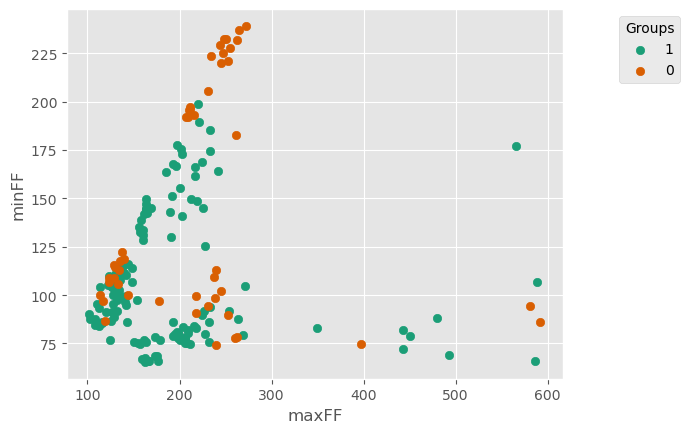

In [22]:
# check that a single scatterplot works
scat_plt(dex['maxFF'], dex['minFF'], dex['status'])

In [37]:
[(x, y) for i, x in enumerate(vars_ff) for y in vars_ff[i+1:] if x != y]


[('avFF', 'maxFF'), ('avFF', 'minFF'), ('maxFF', 'minFF')]

In [51]:
def variable_correlation_plot(variable_list, df, group='status'):
    """
    This method plots the correlations of all unique variable combinations _within_ the variable list provided
    """
    combinations = [(x, y) for i, x in enumerate(vars_ff) for y in vars_ff[i+1:] if x != y]
    for combination in combinations:
        print(combination)
        print(np.corrcoef(df[str(combination[0])], df[str(combination[1])])[0, 1])
        ax = scat_plt(df[str(combination[0])], df[str(combination[1])], df[group])
        # Add a title to the plot and display
        ax.set_title(f'Scatter Plot of {str(combination[0])} vs {str(combination[1])} by {group}')
        plt.show()


('avFF', 'maxFF')
0.4009846762460626


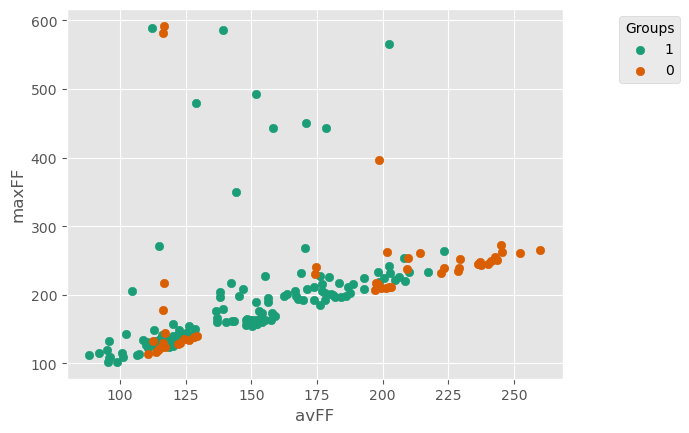

AttributeError: 'NoneType' object has no attribute 'set_title'

In [52]:
variable_correlation_plot(variable_list=vars_ff, df=dex, group='status')

avFF avFF
avFF maxFF
true


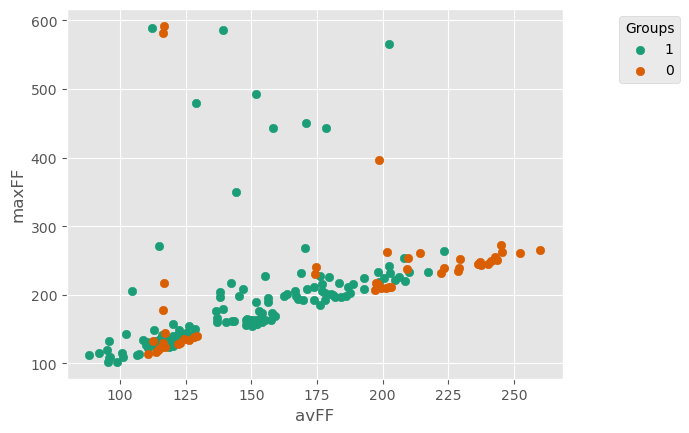

avFF minFF
true


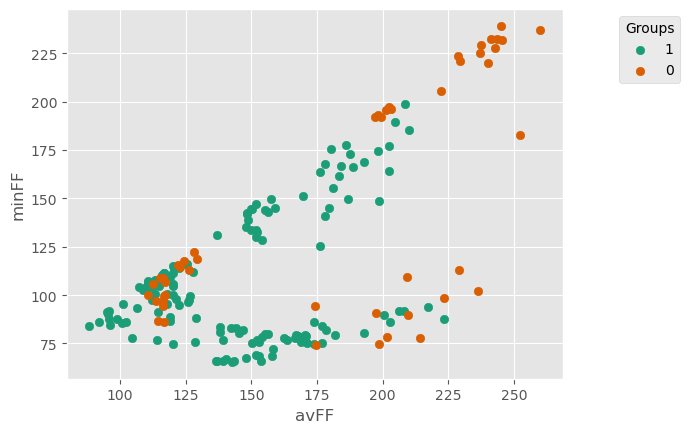

maxFF avFF
true


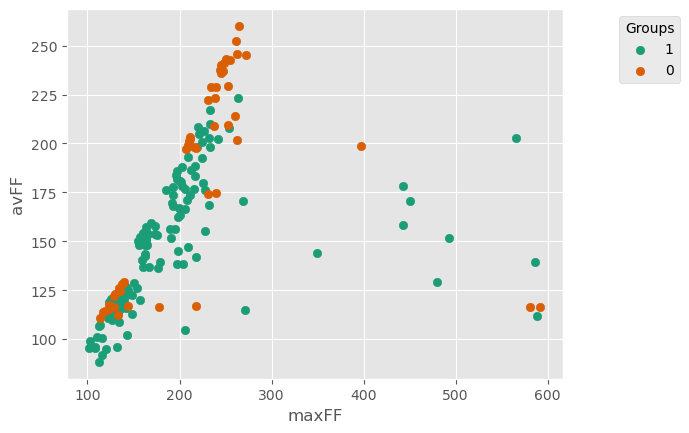

maxFF maxFF
maxFF minFF
true


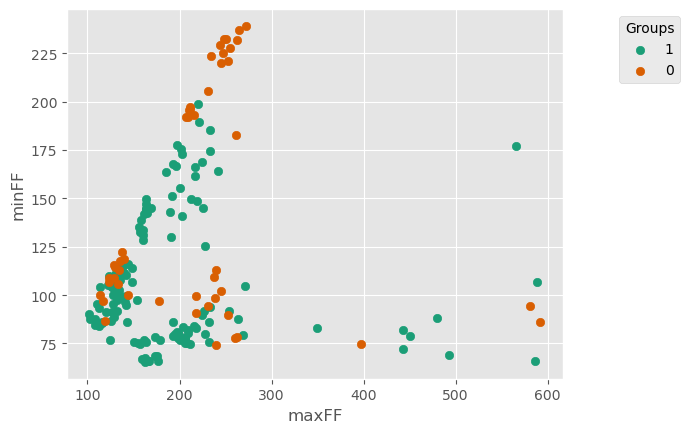

minFF avFF
true


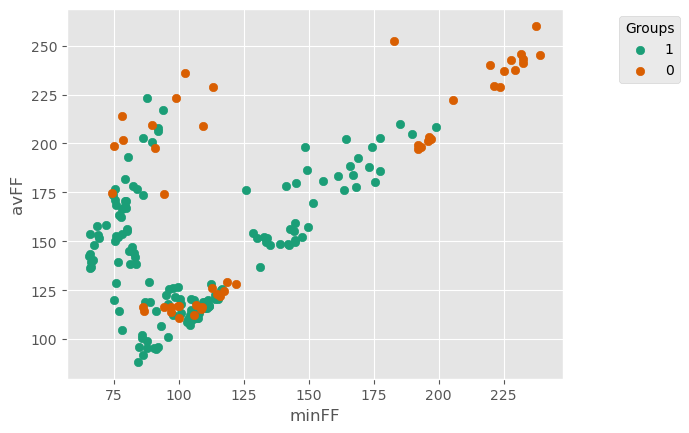

minFF maxFF
true


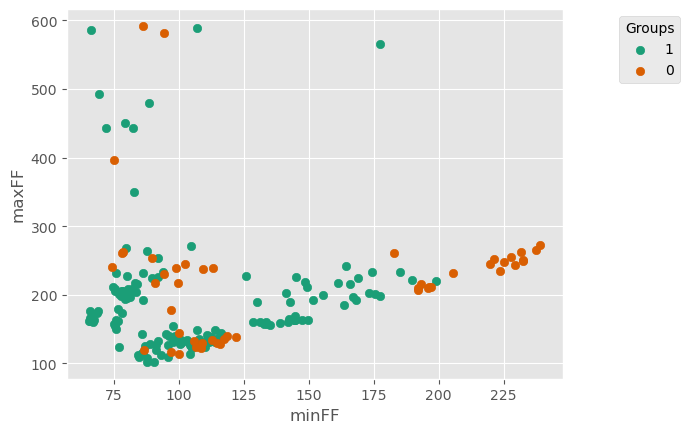

minFF minFF


In [28]:
for var_a in vars_ff:
    for var_b in vars_ff:
        print(var_a, var_b)
        if (var_a and var_b in dex.columns) and (var_a != var_b):
            print('true')
            scat_plt(dex[str(var_a)], dex[str(var_b)], dex['status'])

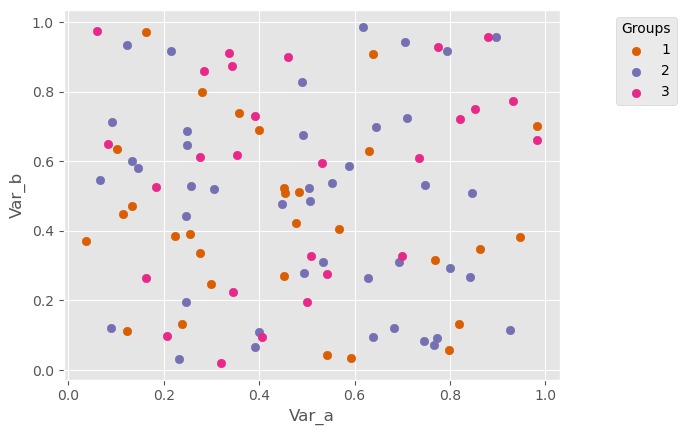

In [45]:
scat_plt(df['Var_a'], df['Var_b'], df['Groups_c'])

# Task 2: Function group_and_average(df, gv)

# Task 3: Classifying patients and controls using kNN